## Investigasi sampel data titanic berikut dengan cara :
1. Cek secara head, tail, sample, info lalu observasi apa yang bisa anda peroleh ?
2. Lakukan Statistical Summary dengan mengekstrak informasi yang didapat dari observasi anda ?
3. Cek apakah ada duplikat dan bagaimana handlenya ?
4. Cek apakah ada missing value, berapa persentasenya jika ada, dan bagaimana cara handlenya ?

## Import Libraries

In [123]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [124]:
# import data
df = pd.read_excel('titanic.xlsx')
df.head()

,survived,name,sex,age
0,1,"Allen, Miss. Elisabeth Walton",female,29.0000
1,1,"Allison, Master. Hudson Trevor",male,0.9167
2,0,"Allison, Miss. Helen Loraine",female,2.0000
3,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000
4,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000


## EDA (Exploratory Data Analysis)

In EDA, i know we have to do five steps
1. Check Data Types
2. Check Missing Values
3. Check Duplicated
4. Check Inconsistent Data
5. Check Outlier

First, i need to know about the data. There are four columns (Survived, Name, Sex, and Age). Then, i have to know if the types is correct or there is something wrong that i can change.

### Handling Data Types

In [125]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  500 non-null    int64  
 1   name      500 non-null    object 
 2   sex       500 non-null    object 
 3   age       451 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 15.8+ KB


Okay, I see the data types of each column. Then, i focus on sex, its actuallt only has two values (Female or Male)--Well, unless youre in Thailand, you can have many value in there, hehehe kidding. Okay, i think i can change its types to categorical (The reason? i want to train myself to think about data efficiency, i know this is a small dataset, but i want to get used to thinking in terms of big data. i can’t afford to be arbitrary with data types, since that would be inefficient in the long run.).

In [126]:
df['sex'] = df['sex'].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   survived  500 non-null    int64   
 1   name      500 non-null    object  
 2   sex       500 non-null    category
 3   age       451 non-null    float64 
dtypes: category(1), float64(1), int64(1), object(1)
memory usage: 12.5+ KB


### Handling Miss Value

Second, I have to see about the missing value, I just use isnull() for this part because it is more efficient in pandas.

In [127]:
df.isnull().sum()

survived     0
name         0
sex          0
age         49
dtype: int64

I get it... there are 49 missing values in age, but I can't just fill them with mean/median, because I don't know about the distribution of the age column. I need to know about that.

In [128]:
df.describe()

,survived,age
count,500.000000,451.000000
mean,0.540000,35.917775
std,0.498897,14.766454
min,0.000000,0.666700
25%,0.000000,24.000000
50%,1.000000,35.000000
75%,1.000000,47.000000
max,1.000000,80.000000


Ohh, the median value is 35 and the mean value is 35.9. Interesting, this makes me understand the distribution and makes it clear that the distribution is a normal distribution, we can use the mean() to fill in the missing values.

In [129]:
df['age'] = df['age'].fillna(df['age'].mean())

In [130]:
df.isnull().sum()

survived    0
name        0
sex         0
age         0
dtype: int64

### Handling Duplicated

Okay, this is 3 out of 5 steps to clean data. In this part, we will see how to handle duplicated data. But before we start, I want to introduce to you about how Dibimbing makes me understand better how to see duplicated data with a simple formula which is data_without_duplication/total_data. I just found out about that, oh my god hahaha.

In [131]:
(len(df.drop_duplicates()))/len(df)

0.998

In [132]:
duplicates = df[df.duplicated(keep=False)]

In [133]:
duplicates

,survived,name,sex,age
104,1,"Eustis, Miss. Elizabeth Mussey",female,54.0
349,1,"Eustis, Miss. Elizabeth Mussey",female,54.0


In [134]:
duplicates_count = duplicates.groupby(list(df.columns)).size().reset_index().rename(columns={0:'Duplikat'})

C:\Users\azizl\AppData\Local\Temp\ipykernel_26476\2521109664.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  duplicates_count = duplicates.groupby(list(df.columns)).size().reset_index().rename(columns={0:'Duplikat'})


In [135]:
duplicates_count

,survived,name,sex,age,Duplikat
0,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,2
1,1,"Eustis, Miss. Elizabeth Mussey",male,54.0,0


In [136]:
df = df.drop_duplicates()

In [137]:
(len(df.drop_duplicates()))/len(df)

1.0

### Handling Inconsistent Data

Okay, this is 4 out of 5 steps in cleaning the data. First, I know that df['survived'] only has two values which are 1 or 0, in the describe we know that there is no inconsistent data because min, max, quartile, and counts_values are normal, so I will skip about survived. Then we have to catch about age, in the describe, I see that min is 0.666 (Not logical for age), median is 35.9 (Not logical either), etc. So we will focus on age.

In [138]:
df.describe()

,survived,age
count,499.000000,499.000000
mean,0.539078,35.881538
std,0.498971,14.013337
min,0.000000,0.666700
25%,0.000000,25.500000
50%,1.000000,35.917775
75%,1.000000,45.000000
max,1.000000,80.000000


In [139]:
df['age'].value_counts().sort_index()

age
0.666700      1
0.833300      1
0.916700      1
1.000000      3
2.000000      1
3.000000      1
4.000000      2
6.000000      2
7.000000      1
8.000000      3
11.000000     1
12.000000     1
13.000000     1
14.000000     1
15.000000     2
16.000000     4
17.000000     7
18.000000    14
19.000000     8
20.000000     2
21.000000    11
22.000000    12
23.000000    11
24.000000    23
25.000000    11
26.000000     7
27.000000     9
28.000000    12
28.500000     1
29.000000    10
30.000000    20
31.000000    11
32.000000     7
32.500000     1
33.000000     8
34.000000    10
35.000000    14
35.917775    49
36.000000    19
37.000000     6
38.000000     8
39.000000     9
40.000000     8
41.000000     3
42.000000    14
43.000000     4
44.000000     6
45.000000    14
45.500000     1
46.000000     5
47.000000    10
48.000000    11
49.000000     8
50.000000    10
51.000000     5
52.000000     6
53.000000     4
54.000000     9
55.000000     8
56.000000     4
57.000000     5
58.000000     6
59.0

Here, I know that the data is inconsistent if the data is less than 1 and the data is not an integer. So I will filter the data to see more details.

In [140]:
df[(df['age'] < 1) | (df['age'] % 1 != 0)].sort_values('age')

,survived,name,sex,age
428,1,"Hamalainen, Master. Viljo",male,0.666700
360,1,"Caldwell, Master. Alden Gates",male,0.833300
1,1,"Allison, Master. Hudson Trevor",male,0.916700
222,0,"Ovies y Rodriguez, Mr. Servando",male,28.500000
173,0,"Keeping, Mr. Edwin",male,32.500000
59,1,"Cassebeer, Mrs. Henry Arthur Jr (Eleanor Genev...",female,35.917775
46,0,"Cairns, Mr. Alexander",male,35.917775
15,0,"Baumann, Mr. John D",male,35.917775
74,0,"Clifford, Mr. George Quincy",male,35.917775
80,0,"Crafton, Mr. John Bertram",male,35.917775


Okay, I got it. I will change the data where when the age is less than 1, I will change it to 1 and if the data is not an integer, I will round the data.

In [141]:
df.loc[df['age'] < 1, 'age'] = 1

In [142]:
df[df['age'] < 1]

,survived,name,sex,age


In [143]:
df.loc[df['age'] % 1 != 0, 'age'] = df['age'].round()

In [144]:
df[df['age']%1 != 0]

,survived,name,sex,age


In [145]:
df.describe()

,survived,age
count,499.000000,499.000000
mean,0.539078,35.889780
std,0.498971,14.011967
min,0.000000,1.000000
25%,0.000000,25.500000
50%,1.000000,36.000000
75%,1.000000,45.000000
max,1.000000,80.000000


### Outlier Check

In [146]:
"""Actually we can see in describe for this variabel, beacuse its categorical
and its just have two option (1 or 0)"""
print(df['survived'].value_counts())

survived
1    269
0    230
Name: count, dtype: int64


In [147]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

batas_atas = Q3 + (1.5 * IQR)
batas_bawah = Q1 - (1.5 * IQR)

outliers = df[(df['age'] > batas_atas) | (df['age'] < batas_bawah)]

In [148]:
outliers

,survived,name,sex,age
14,1,"Barkworth, Mr. Algernon Henry Wilson",male,80.0
61,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0


80 and 76 years old are normal ages for Titanic passengers, I will not delete the data.

### Visualisasi
Okay, by this time I have finished doing the EDA. In the bonus part I will do some visualizations for the purpose of having information in visual form

Value of Passengers:
sex
male      288
female    211
Name: count, dtype: int64


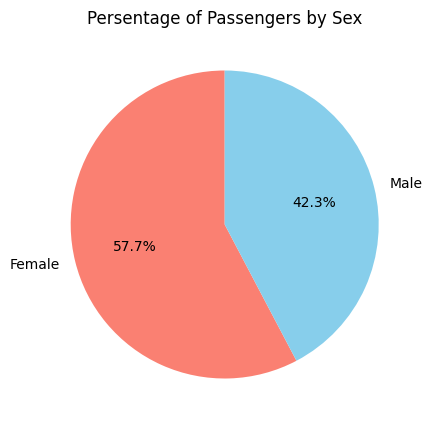

In [170]:
print(f'Value of Passengers:\n{df['sex'].value_counts()}')

plt.figure(figsize=(10, 5))
plt.pie(df['sex'].value_counts(), labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90, colors=['salmon', 'skyblue'])
plt.title('Persentage of Passengers by Sex')
plt.show()

Survived and Non-Survived: survived
1    269
0    230
Name: count, dtype: int64


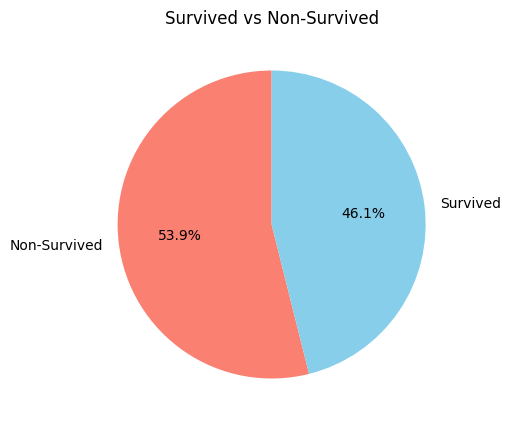

In [181]:
print(f'Survived and Non-Survived: {df["survived"].value_counts()}')

plt.figure(figsize=(10, 5))
plt.pie(df['survived'].value_counts(), labels=['Non-Survived', 'Survived'], autopct='%1.1f%%', startangle=90, colors=['salmon', 'skyblue'])
plt.title('Survived vs Non-Survived')
plt.show()

Value of Passengers that Survived:
sex
female    196
male       73
Name: count, dtype: int64


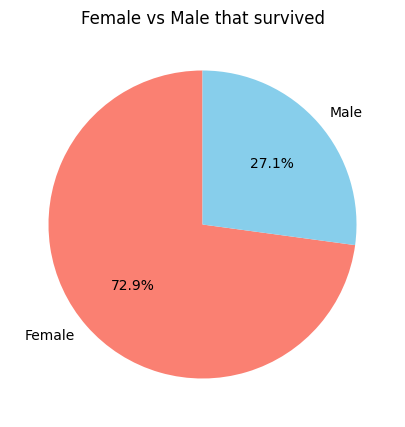

In [171]:
print(f'Value of Passengers that Survived:\n{df[df['survived'] == 1]['sex'].value_counts()}')

plt.figure(figsize=(10, 5))
plt.pie(df[df['survived'] == 1]['sex'].value_counts(), labels=['Female', 'Male'], autopct='%1.1f%%', startangle=90, colors=['salmon', 'skyblue'])
plt.title('Female vs Male that survived')
plt.show()

Text(0.5, 0, 'Age')

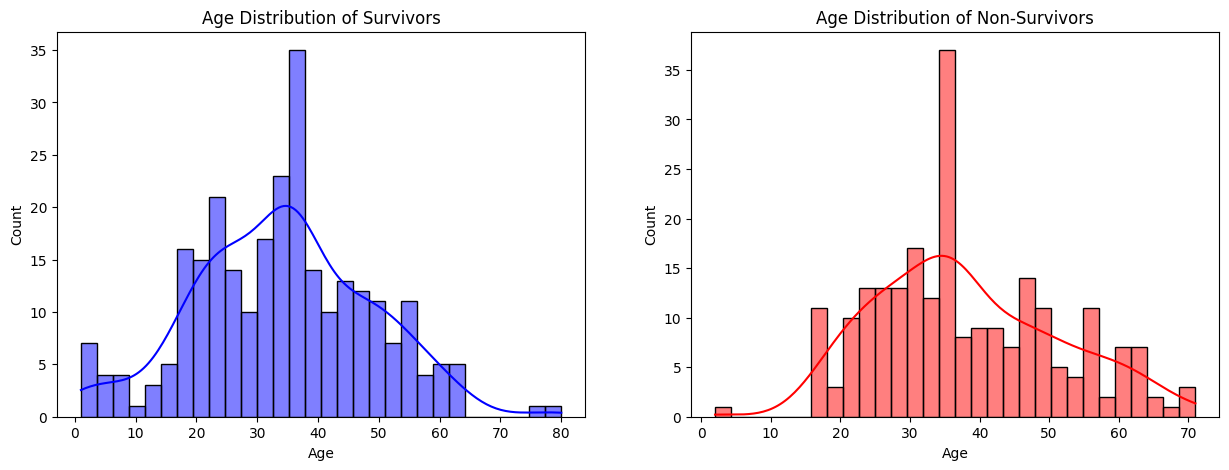

In [184]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df[df['survived'] == 1]['age'], bins=30, kde=True, ax = ax[0], color='blue')
ax[0].set_title('Age Distribution of Survivors')
ax[0].set_xlabel('Age')

sns.histplot(df[df['survived'] == 0]['age'], bins=30, kde=True, ax = ax[1], color='red')
ax[1].set_title('Age Distribution of Non-Survivors')
ax[1].set_xlabel('Age')

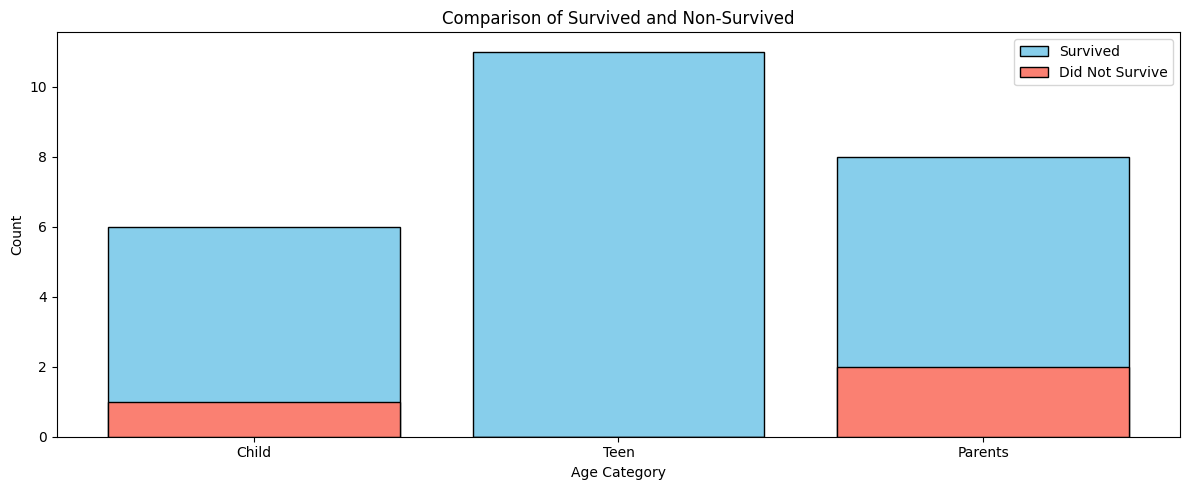

In [151]:
bins = [0, 12, 18, 60, 100]
labels = ['Child', 'Teen', 'Adult', 'Parents']
df['age_category'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

survived_females = df[(df['survived'] == 1) & (df['sex'] == 'female')]
non_survived_females = df[(df['survived'] == 0) & (df['sex'] == 'female')]

age_category_survived = survived_females['age_category'].value_counts().reindex(labels)
without_adult_survived = age_category_survived.drop('Adult')
age_category_non = non_survived_females['age_category'].value_counts().reindex(labels)
without_adult_non = age_category_non.drop('Adult')


fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(without_adult_survived.index, without_adult_survived.values, color='skyblue', edgecolor='black')
ax.bar(without_adult_non.index, without_adult_non.values, color='salmon', edgecolor='black')
ax.set_title('Comparison of Survived and Non-Survived')
ax.set_xlabel('Age Category')
ax.set_ylabel('Count')
ax.legend(['Survived', 'Did Not Survive'], loc='upper right')
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Age')

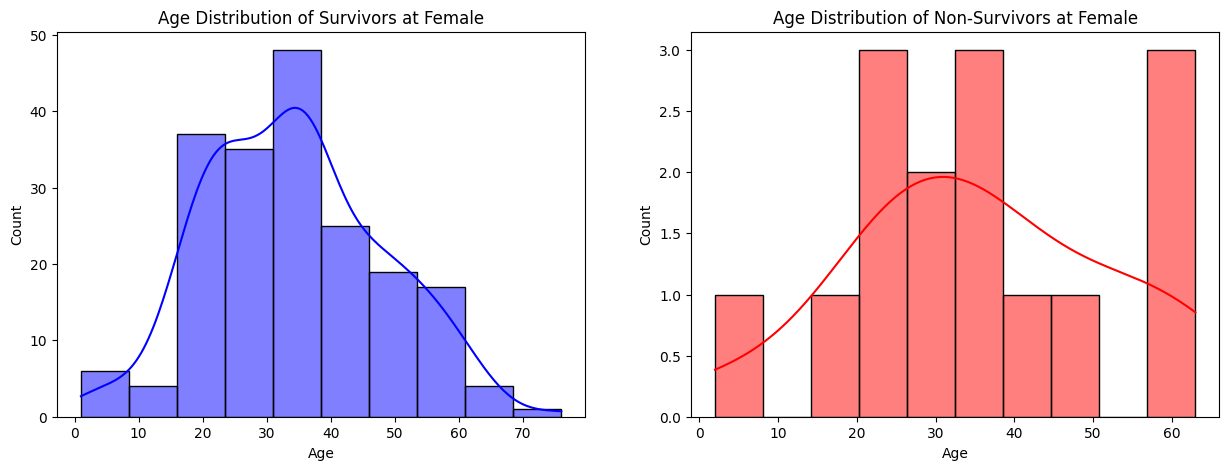

In [185]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df[(df['survived'] == 1) & (df['sex'] == 'female')]['age'], bins=10, kde=True, ax = ax[0], color='blue')
ax[0].set_title('Age Distribution of Survivors at Female')
ax[0].set_xlabel('Age')

sns.histplot(df[(df['survived'] == 0) & (df['sex'] == 'female')]['age'], bins=10, kde=True, ax = ax[1], color='red')
ax[1].set_title('Age Distribution of Non-Survivors at Female')
ax[1].set_xlabel('Age')

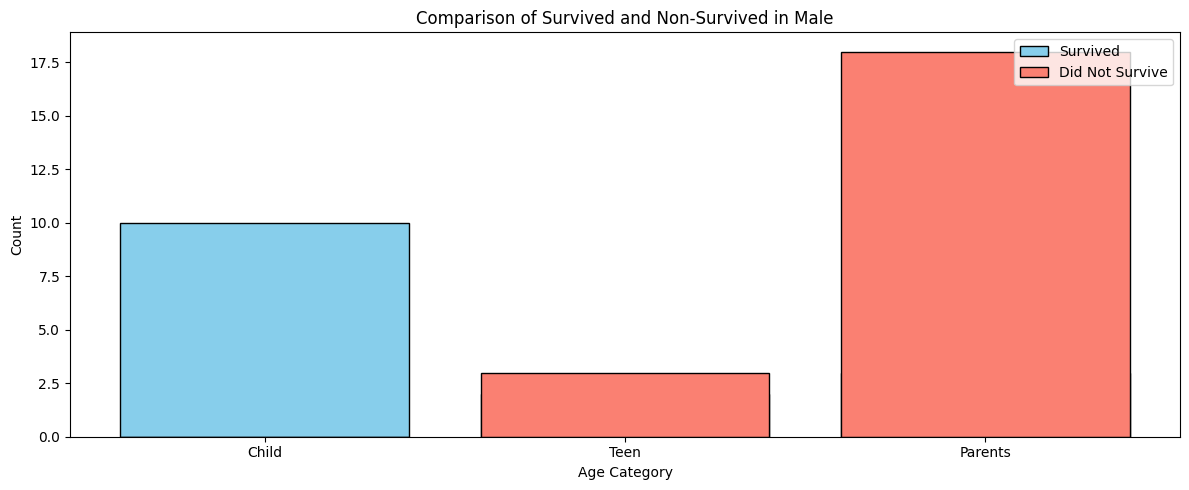

In [153]:
bins = [0, 12, 18, 60, 100]
labels = ['Child', 'Teen', 'Adult', 'Parents']
df['age_category'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

survived_males = df[(df['survived'] == 1) & (df['sex'] == 'male')]
non_survived_males = df[(df['survived'] == 0) & (df['sex'] == 'male')]

age_category_survived_male = survived_males['age_category'].value_counts().reindex(labels)
without_adult_survived_male = age_category_survived_male.drop('Adult')
age_category_non_male = non_survived_males['age_category'].value_counts().reindex(labels)
without_adult_non_male = age_category_non_male.drop('Adult')


fig, ax = plt.subplots(figsize=(12, 5))
ax.bar(without_adult_survived_male.index, without_adult_survived_male.values, color='skyblue', edgecolor='black')
ax.bar(without_adult_non_male.index, without_adult_non_male.values, color='salmon', edgecolor='black')
ax.set_title('Comparison of Survived and Non-Survived in Male')
ax.set_xlabel('Age Category')
ax.set_ylabel('Count')
ax.legend(['Survived', 'Did Not Survive'], loc='upper right')
plt.tight_layout()
plt.show()

Text(0.5, 0, 'Age')

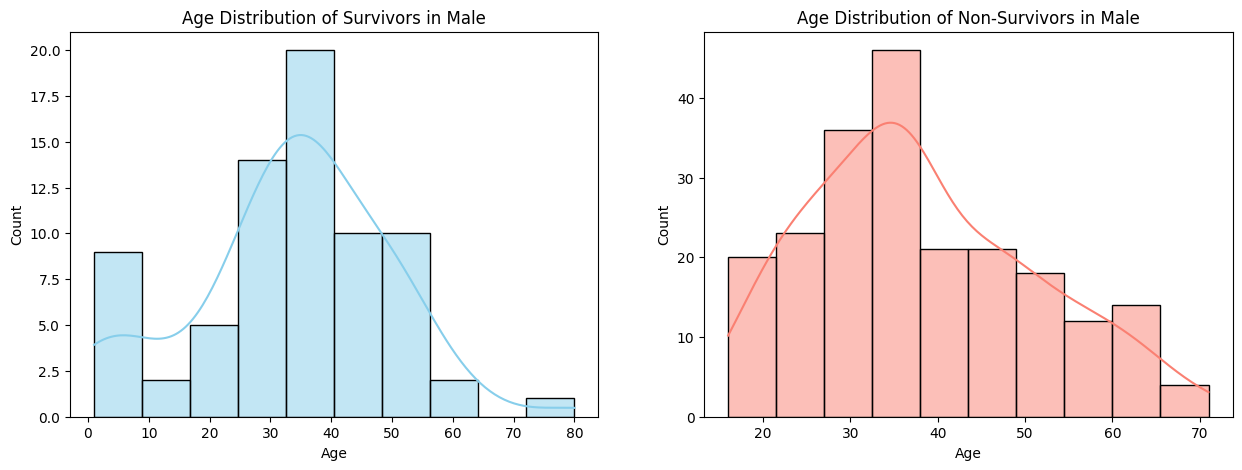

In [154]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df[(df['survived'] == 1) & (df['sex'] == 'male')]['age'], bins=10, kde=True, ax = ax[0], color='skyblue')
ax[0].set_title('Age Distribution of Survivors in Male')
ax[0].set_xlabel('Age')

sns.histplot(df[(df['survived'] == 0) & (df['sex'] == 'male')]['age'], bins=10, kde=True, ax = ax[1], color='salmon')
ax[1].set_title('Age Distribution of Non-Survivors in Male')
ax[1].set_xlabel('Age')

### What insights can I take away from this visualization?

Okay.
1. I know that 70% of survivors are female
2. The age distribution of female survivors is majority Teenagers
3. The age distribution of male survivors is majority Children 
4. The age distribution of male non-survivors is majority Adults or Parents

This means that in the accident, the first to be prioritized are teenagers, children, and female. Therefore, we can say that the male in that incident sacrificed themselves for female. 

This brings a new insight, which is that there is a possibility that the means of rescue could not accommodate everyone, so some had to sacrifice themselves.

---


## END

That's how to clean data and how to extract information from data. Thank you :)